Задание. (1.1 номера нет)Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.(4 вариант)

In [1]:
def qz(x, y):
  return (x+3*y) / (3*(x**2)+y**2+1)

def qSumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range (4)]
  Y = [0 for i in range(4)]
  X[2] = oldX[sortedId [2]]
  X[3] = oldX[sortedId[2]]
  X[0] = oldX[sortedId [0]]
  X[1] = oldX[sortedId[1]]
  Y[0] = oldY[sortedId [2]]
  Y[1] = oldY[sortedId[2]]
  Y[2] = oldY[sortedId[0]]
  Y[3] = oldY[sortedId[1]]
  return X, Y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

def evostep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]
  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)
  return X, Y, Z  

def evoSteps(X, Y, stepsNum = 4) :
  results = []
  for i in range(stepsNum):
    arrZ = [qz(x, Y[i]) for i, x in enumerate (X) ]
    X, Y, Z = evostep(X, Y, arrZ)
    X, Y = exchangeScheme (X, Y, sorting(Z))
    results.append([X, Y, qSumZ(arrZ), arrZ])
  return X, Y, results

X = [-1, 0, 2, 4]
Y = [-2, 1, -1, 0]
results = evoSteps (X, Y)

for i in range(len(results [2])):
  print (f'max_{i + 1}_step: {results [2][i][2]}')
  qualityArrZ = []

for i in range(len(results [2])):
  qualityArrZ += results [2][i][3]
  
print (f'max Z:{max(qualityArrZ)}')

max_1_step: 0.6352040816326531
max_2_step: -1.002857142857143
max_3_step: 2.150989010989011
max_4_step: 2.2142857142857144
max Z:1.5


Задание. Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

Лучший выбранный маршрут: [1, 3, 6, 2, 5, 4, 1]
Длина лучшего выбранного маршрута: 162
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178]


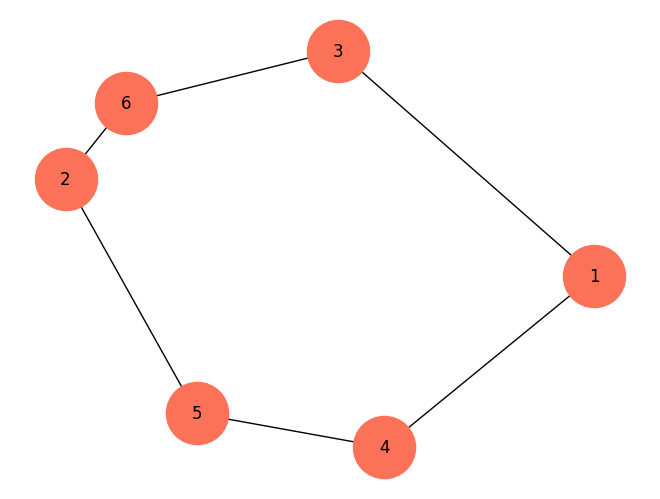

In [2]:
import networkx as nx
from math import e
distances = [(1,2,17), (1,3,39), (1,4,32), (1,5,28), (1,6,18), (2,3,24), (2,4,28),
             (2,5,35), (2,6,13), (3,4,25), (3,5,43), (3,6,23), (4,5,20), (4,6,16), (5,6,24)] # длины ребер
V = [1,5,2,6,3,4,1] # последовательность прохождения маршрута
Z = [(3, 4),(4, 5),(5, 2),(6, 2)] # последовательность замен вершин
P = [78,79,25,82] # случайные числа, выпавшие в процессе счёта
T = 100 # начальная температура
#Данные из примера
# distances = [(1,2,20), (1,3,40), (1,4,42), (1,5,33), (1,6,21), (2,3,26), (2,4,38), (2,5,42), (2,6,17), (3,4,22), (3,5,43), (3,6,21), (4,5,27), (4,6,22),(5,6,26)]
# V = [1,4,5,2,6, 3,1]
# Z = [(3,4), (4,6), (5,2), (6,2)]
# P=[49,54,43,54]
# T=100
# функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)
# функция изменения температуры
def reductTemp (prevT):
  nextT = 0.5 * prevT
  return nextT
# graph = nx. Graph() # создание пустого графа
# graph.add_weighted_edges_from(distances) # добабление весов рёбер
# отрисовка графа с заданными вершинами
# nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
# вычисление длины маршрута
def routeLength (V, distances):
  edges = []
  for i in range(len (V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)
# одна перестановка 8 пути
def routeOneReplacement (arrV, Z, replacementByName = True) :
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV
# перестановки в пути
def routeReplacement (V, Z):
  for z in Z:
    V = routeOneReplacement (V, z)
  return V
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  # циклы методом отжига
  for i in range (len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки 
    newS = routeLength(newV, distances) # длина нового маршрута
    arrSum. append (newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов
  # 6 случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas,T) # подсчёт вероятности
    # если заданная вероятность попадает 8 интервал от 0 до р, то новый маршрут выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp (T) # вычисление температуры
  return V, arrSum
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
     for distance in distances:
        if (distance[0] == bestRoute [i] and distance [1] == bestRoute[i + 1]) or (distance [1] == bestRoute[i] and distance [0] == bestRoute [i + 1]):
          newDistances.append (distance)
  graph = nx. Graph() # создание пустого графа
  graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print (f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength (bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута

(1.2 номера нет)На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.

Решение для S5
Лучший выбранный маршрут: [1, 2, 6, 3, 5, 4, 1]
Длина лучшего выбранного маршрута: 148
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178, 148]


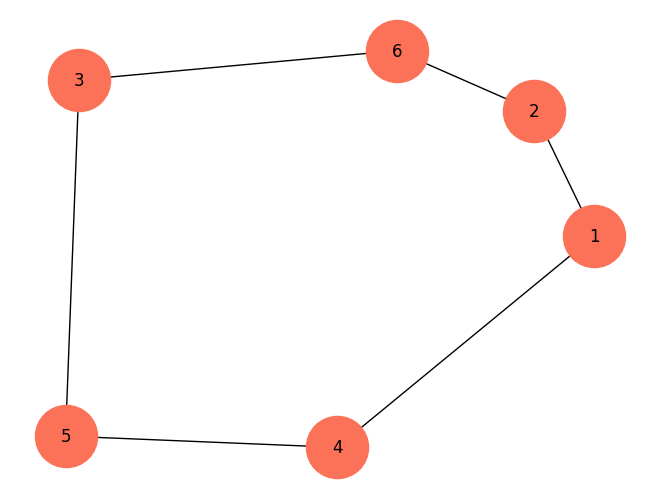

In [3]:
import networkx as nx
from math import e
distances = [(1,2,17), (1,3,39), (1,4,32), (1,5,28), (1,6,18), (2,3,24), (2,4,28),
             (2,5,35), (2,6,13), (3,4,25), (3,5,43), (3,6,23), (4,5,20), (4,6,16), (5,6,24)] # длины ребер
V = [1,5,2,6,3,4,1] # последовательность прохождения маршрута
Z = [(3, 4),(4, 5),(5, 2),(6, 2),(2,4)] # последовательность замен вершин
P = [78,79,25,82, 38] # случайные числа, выпавшие в процессе счёта
T = 100 # начальная температура
#Данные из примера
# distances = [(1,2,20), (1,3,40), (1,4,42), (1,5,33), (1,6,21), (2,3,26), (2,4,38), (2,5,42), (2,6,17), (3,4,22), (3,5,43), (3,6,21), (4,5,27), (4,6,22),(5,6,26)]
# V = [1,4,5,2,6, 3,1]
# Z = [(3,4), (4,6), (5,2), (6,2)]
# P=[49,54,43,54]
# T=100
# функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)
# функция изменения температуры
def reductTemp (prevT):
  nextT = 0.5 * prevT
  return nextT
# graph = nx. Graph() # создание пустого графа
# graph.add_weighted_edges_from(distances) # добабление весов рёбер
# отрисовка графа с заданными вершинами
# nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
# вычисление длины маршрута
def routeLength (V, distances):
  edges = []
  for i in range(len (V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)
# одна перестановка 8 пути
def routeOneReplacement (arrV, Z, replacementByName = True) :
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV
# перестановки в пути
def routeReplacement (V, Z):
  for z in Z:
    V = routeOneReplacement (V, z)
  return V
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  # циклы методом отжига
  for i in range (len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки 
    newS = routeLength(newV, distances) # длина нового маршрута
    arrSum. append (newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов
  # 6 случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas,T) # подсчёт вероятности
    # если заданная вероятность попадает 8 интервал от 0 до р, то новый маршрут выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp (T) # вычисление температуры
  return V, arrSum
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
     for distance in distances:
        if (distance[0] == bestRoute [i] and distance [1] == bestRoute[i + 1]) or (distance [1] == bestRoute[i] and distance [0] == bestRoute [i + 1]):
          newDistances.append (distance)
  graph = nx. Graph() # создание пустого графа
  graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print('Решение для S5')
print (f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength (bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута

Решение для S6
Лучший выбранный маршрут: [5, 3, 6, 2, 1, 4, 1]
Длина лучшего выбранного маршрута: 160
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178, 160, 174]


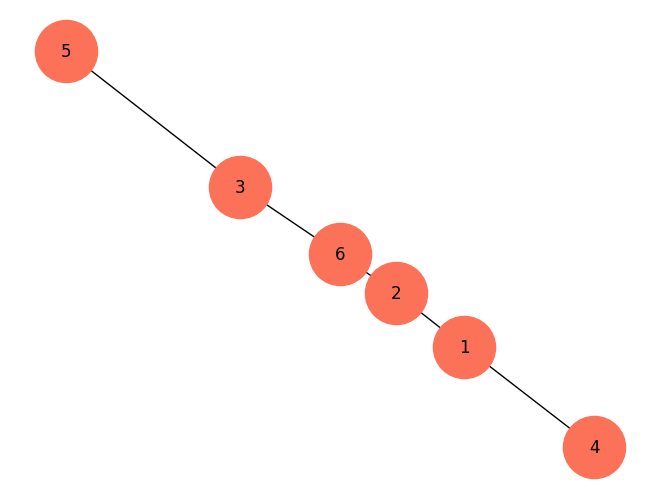

In [4]:
import networkx as nx
from math import e
distances = [(1,2,17), (1,3,39), (1,4,32), (1,5,28), (1,6,18), (2,3,24), (2,4,28),
             (2,5,35), (2,6,13), (3,4,25), (3,5,43), (3,6,23), (4,5,20), (4,6,16), (5,6,24)] # длины ребер
V = [1,5,2,6,3,4,1] # последовательность прохождения маршрута
Z = [(3, 4),(4, 5),(5, 2),(6, 2), (1,5), (2,4)] # последовательность замен вершин
P = [78,79,25,82, 38,95] # случайные числа, выпавшие в процессе счёта
T = 100 # начальная температура
#Данные из примера
# distances = [(1,2,20), (1,3,40), (1,4,42), (1,5,33), (1,6,21), (2,3,26), (2,4,38), (2,5,42), (2,6,17), (3,4,22), (3,5,43), (3,6,21), (4,5,27), (4,6,22),(5,6,26)]
# V = [1,4,5,2,6, 3,1]
# Z = [(3,4), (4,6), (5,2), (6,2)]
# P=[49,54,43,54]
# T=100
# функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)
# функция изменения температуры
def reductTemp (prevT):
  nextT = 0.5 * prevT
  return nextT
# graph = nx. Graph() # создание пустого графа
# graph.add_weighted_edges_from(distances) # добабление весов рёбер
# отрисовка графа с заданными вершинами
# nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
# вычисление длины маршрута
def routeLength (V, distances):
  edges = []
  for i in range(len (V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))
  return sum(edges)
# одна перестановка 8 пути
def routeOneReplacement (arrV, Z, replacementByName = True) :
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV
# перестановки в пути
def routeReplacement (V, Z):
  for z in Z:
    V = routeOneReplacement (V, z)
  return V
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  # циклы методом отжига
  for i in range (len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки 
    newS = routeLength(newV, distances) # длина нового маршрута
    arrSum. append (newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов
  # 6 случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas,T) # подсчёт вероятности
    # если заданная вероятность попадает 8 интервал от 0 до р, то новый маршрут выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp (T) # вычисление температуры
  return V, arrSum
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
     for distance in distances:
        if (distance[0] == bestRoute [i] and distance [1] == bestRoute[i + 1]) or (distance [1] == bestRoute[i] and distance [0] == bestRoute [i + 1]):
          newDistances.append (distance)
  graph = nx. Graph() # создание пустого графа
  graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print('Решение для S6')
print (f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength (bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута

Вывод: увеличение количества циклов может привести к улучшению результата, так как возможно будет найден более оптимальный путь, однако из-за случайности выбора очередного маршрута результат может не улучшится или даже ухудшиться